In [ ]:
from IPython.display import clear_output
import os,cv2,random,torch,torchvision
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
AllClasses =['children', 'adults']


class DataProcess(torch.utils.data.Dataset):
    def __init__(self, ImagesPath, ImageTransformer):
        global AllClasses
        def GetImage(Class):
            images = [x for x in os.listdir(ImagesPath[Class])]
            print(f'Found {len(images)} {Class} examples')
            return images
        
        self.images = {}
        self.Classes = AllClasses
        
        for Class in self.Classes:
            self.images[Class] = GetImage(Class)
            
        self.ImagesPath = ImagesPath
        self.ImageTransformer = ImageTransformer
    def __len__(self):
        return sum([len(self.images[Class]) for Class in self.Classes])
    def __getitem__(self, index):
        Class = random.choice(self.Classes)
        index = index % len(self.images[Class])
        NameOfPicture = self.images[Class][index]
        PathOfPicture = os.path.join(self.ImagesPath[Class], NameOfPicture)
        image = Image.open(PathOfPicture).convert('RGB')
        
        return self.ImageTransformer(image), self.Classes.index(Class)

def AccCalc(LabelsValues,OutputValues) : 
  _,PredictedValues = torch.max(OutputValues, 1)
  return sum((PredictedValues == LabelsValues).numpy())

In [ ]:
SavedImages,TrainingDataSize,TestingDataSize=0,0,0
ThisModel,ThisLossFunction ,ThisOptimizer = None,None,None
ThisTransformer = torchvision.transforms.Compose([torchvision.transforms.Resize(size=(50,50)),
                                                  torchvision.transforms.RandomHorizontalFlip(),
                                                  torchvision.transforms.ToTensor()])

In [ ]:
ImagesPath = {i:os.path.join(r'/content/drive/MyDrive/AgeClassification/test1/',i) for i in AllClasses}

TestingData = DataProcess(ImagesPath, ThisTransformer)
TestingDataSize= len(TestingData)
print("Length of test set    :  ", len(TestingData))

In [ ]:
BatchSize = 10

TestingDataLength = torch.utils.data.DataLoader(TestingData, batch_size=BatchSize, shuffle=True)
print("Lentgth of test batches", len(TestingDataLength))

In [ ]:
ThisModel = torch.load('/content/drive/MyDrive/AgeClassificationV4-30.h5')

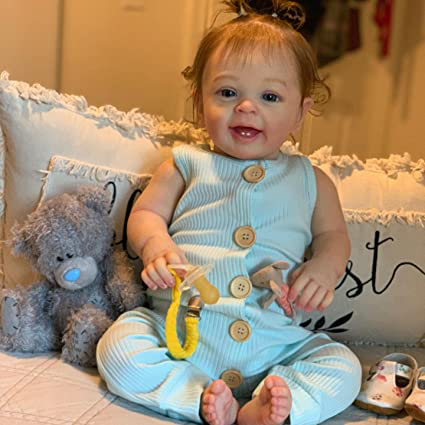

Image predicted as  children


<ipython-input-11-fd72ddd6cdbc>:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(pred)


In [ ]:
from PIL import Image
import urllib.request
from io import BytesIO
ThisModel.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm


# Set the URL of the image
url = 'https://m.media-amazon.com/images/I/71pMG-AQ59L._AC_SX425_.jpg'

#url = 'https://yt3.googleusercontent.com/-XN1RK2CLNsm_focGsw7S1jcn5M18BsfL8GP3sh2SnyUhMeB5kWTSD1-_6FhAMpg2DlRgz3EBIc=s900-c-k-c0x00ffffff-no-rj'

#url = 'https://raisingchildren.net.au/__data/assets/image/0024/47742/baby-behaviour-and-awareness.jpg'
#url = 'https://upload.wikimedia.org/wikipedia/commons/8/8c/Cristiano_Ronaldo_2018.jpg'
#url = 'https://img.a.transfermarkt.technology/portrait/header/28003-1671435885.jpg' #Messi
#url = 'https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQUFHPJubDr2gqUa_rsQW9vXlFdrmtiZ4T7tXPAALClOGYNVXcdSsOQISyyhPI8vkl31umDKkaoJBn9ue-Pb5M' #Kid girl
#url='https://upload.wikimedia.org/wikipedia/commons/6/6c/Kid_boy.jpg' #Kid boy

# Download the image data from the URL
with urllib.request.urlopen(url) as url_response:
    image_data = url_response.read()

# Open the image from the downloaded data
img = Image.open(BytesIO(image_data))

# Display the image
img.show()

x = ThisTransformer(img)  # Preprocess image
x = x.unsqueeze(0)  # Add batch dimension

output = ThisModel(x)  # Forward pass
pred = torch.argmax(output, 1)  # Get predicted class if multi-class classification
#print('Image predicted as ', pred)


t = torch.tensor(pred)
# Get the value of the element as a scalar
value = t.item()

print('Image predicted as ',AllClasses[value] )

In [ ]:
ThisModel.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm


img = Image.open('/content/drive/MyDrive/AgeClassification/test1/children/rasheed.jpg')  # Load image as PIL.Image
x = ThisTransformer(img)  # Preprocess image
x = x.unsqueeze(0)  # Add batch dimension

output = ThisModel(x)  # Forward pass
pred = torch.argmax(output, 1)  # Get predicted class if multi-class classification
print('Image predicted as ', pred)

Image predicted as  tensor([1])


In [ ]:
i=0
AllYValue,AllOutput = [],[]
ThisModel.eval()
ThisLossFunction = torch.nn.CrossEntropyLoss()
TestLoss,TestAccuracy  = 0,0
for X,y in TestingDataLength:
  i+=1
  # if i ==50 : break
  if i%50==0 : print(i)
  ThisOutput = ThisModel(X)
  AllYValue.extend(y)
  _,PredictedValues = torch.max(ThisOutput, 1)
  AllOutput.extend([int(i) for i in PredictedValues])
  ThisLoss = ThisLossFunction(ThisOutput,y)
  TestLoss += ThisLoss.item()
  TestAccuracy += AccCalc(y,ThisOutput)
z=0
for a,b in zip(AllOutput,[int(i) for i in AllYValue]) : 
  if a==b : z+=1
z/len(AllOutput)

0.5

In [ ]:
TestLoss/i,TestAccuracy/i*0.10

(1.0828380584716797, 0.1)

In [ ]:
print(f'Model Accuracy is {np.round(TestAccuracy/i*0.10,2)} and loss is {np.round(TestLoss/i,2)}')

Model Accuracy is 0.1 and loss is 1.08


In [ ]:
AllYValue = [int(i) for i in AllYValue]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(AllOutput,AllYValue)

array([[1, 0],
       [1, 0]])

In [ ]:
print(classification_report(AllOutput,AllYValue))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
